In [2]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/'

data = pd.read_csv(workdir + '20230313_nir_titir.csv')


In [3]:
for name in data.columns[2:]:
    x = data[name][300:400]  - data[data.columns[1]][300:400]
    y = sum(x)/len(x)
    data[name] = data[name] - y

In [4]:
data.columns

Index(['Wavelength (nm)', 'H2O', 'nir05', 'nir10', 'nir15', 'nir20', 'nir25',
       'nir30', 'nir35', 'nir40', 'nir40_prot05', 'nir40_prot10',
       'nir40_prot20', 'nir40_prot30', 'nir40_prot40', 'nir40_prot60',
       'nir40_prot80', 'nir40_prot100', 'nir40_prot120', 'nir40_prot160',
       'nir40_prot200', 'nir40_prot240', 'nir40_prot280', 'nir40_prot320',
       'nir40_prot360', 'nir40_prot400', 'nir40_prot440', 'nir40_prot480',
       'H2O.1', 'H2O_prot20', 'H2O_prot40', 'H2O_prot60', 'H2O_prot80'],
      dtype='object')

(-0.05, 0.25)

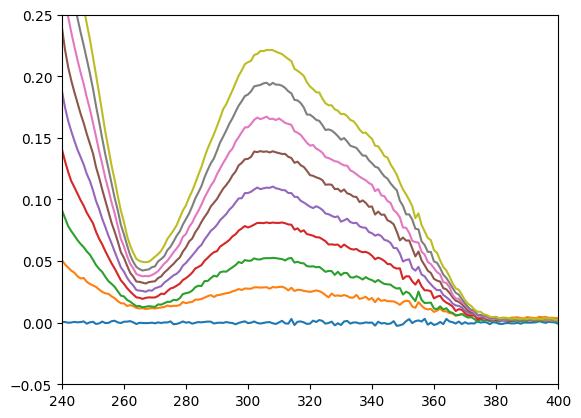

In [5]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:10]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.25])

H2O      0.001012
nir05    0.026565
nir10    0.048425
nir15    0.073837
nir20    0.098967
nir25    0.127810
nir30    0.152424
nir35    0.178282
nir40    0.202592
Name: 117, dtype: float64
317
[[0.        ]
 [0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
score 0.9994200828675596
intercept_ -0.0007552085113529811
coef_ [20.3118245]


(-0.05, 0.4)

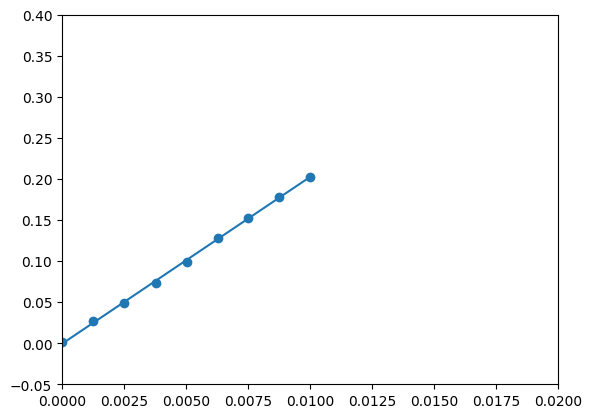

In [6]:
nir_xs = [0/396, 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]

nir_ys = data.iloc[317-200, 1:10]
print(data.iloc[317-200, 1:10])

print(data.iloc[317-200, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
nir_xs_re = np.array(nir_xs).reshape(-1, 1)
nir_reg_317 = LinearRegression().fit(nir_xs_re, nir_ys)
print(nir_xs_re)
print('score {}'.format(nir_reg_317.score(nir_xs_re, nir_ys)))
print('intercept_ {}'.format(nir_reg_317.intercept_))
print('coef_ {}'.format(nir_reg_317.coef_))

fig,ax = plt.subplots()
ax.scatter(nir_xs, nir_ys)
nir_ys_317_pred = np.array([nir_reg_317.predict(np.array(xr).reshape(1, -1)) for xr in nir_xs_re])

ax.plot(nir_xs_re, nir_ys_317_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.4])


[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946]
H2O.1         0.004256
H2O_prot20    0.003364
H2O_prot40    0.003392
H2O_prot60    0.000931
H2O_prot80    0.005629
Name: 127, dtype: float64


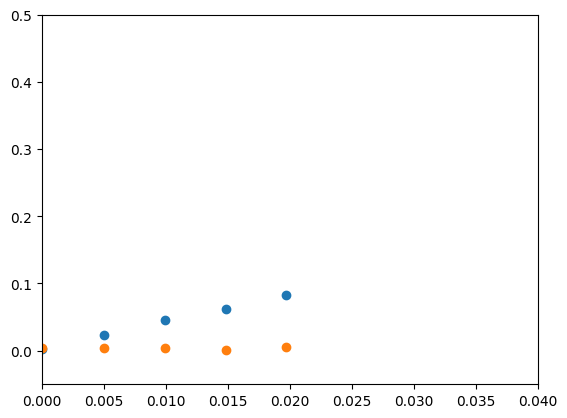

In [7]:
fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406]
ys_280 = data.iloc[280-200, 28:]
ys_317 = data.iloc[317-190, 28:]
ax.scatter(xs, ys_280)
ax.scatter(xs, ys_317)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.5])
print(xs)

data.columns[28]
print(ys_317)




In [8]:

xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8]
prot_conc_stock = []
for i in range(4):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))

[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]]
0.9981829621524343
0.0030214163589421875
H2O.1        -0.076218
H2O_prot20    1.792564
H2O_prot40    3.750347
H2O_prot60    5.197454
H2O_prot80    7.016597
Name: 80, dtype: float64
H2O.1        -0.076218
H2O_prot20    1.792564
H2O_prot40    3.750347
H2O_prot60    5.197454
H2O_prot80    7.016597
Name: 80, dtype: float64
[358.51285394516253, 376.9098470249834, 349.9619332255287, 356.0923073201295]
360.98802919021387


0.001075110618092734
H2O.1        -0.076218
H2O_prot20    1.792564
H2O_prot40    3.750347
H2O_prot60    5.197454
H2O_prot80    7.016597
Name: 80, dtype: float64
H2O.1         0.004256
H2O_prot20    0.003364
H2O_prot40    0.003392
H2O_prot60    0.000931
H2O_prot80    0.005629
Name: 127, dtype: float64
[2.01680616e-05]
0.0034431722222921213


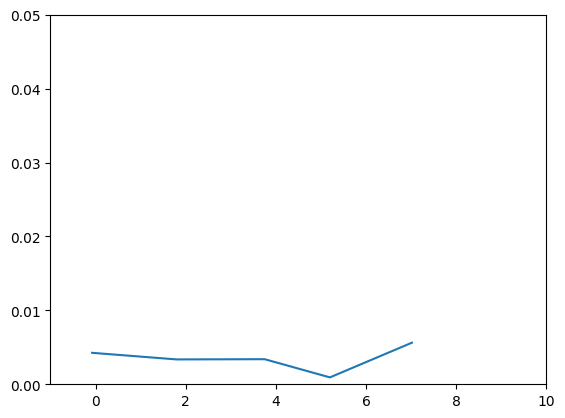

In [11]:
fig,ax = plt.subplots()
reg_prot_317_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_317)
print(reg_prot_317_conc.score(np.array(prot_conc).reshape(-1, 1), ys_317))
print(prot_conc)
print(ys_317)
ax.plot(prot_conc, ys_317)
plt.xlim([-1, 10])
plt.ylim([0, 0.05])
print(reg_prot_317_conc.coef_)
print(reg_prot_317_conc.intercept_)

[0.0, 0.45068664169787764, 0.9002493765586035, 1.7960199004975124, 2.6873449131513647, 3.5742574257425743, 5.334975369458128, 7.078431372549019, 8.804878048780488, 10.514563106796116, 13.884615384615385, 17.19047619047619, 20.433962264150942, 23.61682242990654, 26.74074074074074, 29.807339449541285, 32.81818181818182, 35.77477477477478, 38.67857142857143]
real_titri_ys-----------------------------------
nir40            0.202592
nir40_prot05     0.204676
nir40_prot10     0.202712
nir40_prot20     0.206020
nir40_prot30     0.208349
nir40_prot40     0.209758
nir40_prot60     0.215884
nir40_prot80     0.219186
nir40_prot100    0.225250
nir40_prot120    0.225853
nir40_prot160    0.234330
nir40_prot200    0.237855
nir40_prot240    0.240844
nir40_prot280    0.236574
nir40_prot320    0.236637
nir40_prot360    0.236776
nir40_prot400    0.234383
nir40_prot440    0.232956
nir40_prot480    0.231485
Name: 117, dtype: float64


(-0.02, 0.1)

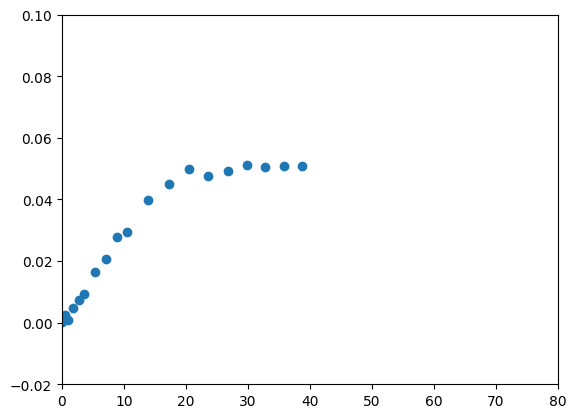

In [41]:
titri_adds = [0, 0.5, 1, 2, 3, 4, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*361/titri_vols[i] for i in range(len(titri_adds))]
#prot_conc_ys = reg_prot_317_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))
print(prot_conc_xs)

nir_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('nir_titri_xs-----------------------------------')
#print(nir_titri_xs)

nir_titri_ys = nir_reg_317.predict(nir_titri_xs)

#print('nir_titri_ys-----------------------------------')
#print(nir_titri_ys)
#print('prot_titri_ys-----------------------------------')
#print(prot_titri_ys)
real_titri_ys = data.iloc[317-200, 9:28]
print('real_titri_ys-----------------------------------')
print(real_titri_ys)

corr_titri_ys = real_titri_ys - nir_titri_ys 

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.02, 0.1])

In [53]:
result = pd.DataFrame({'conc':prot_conc_xs, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'nir_processed.csv')